In [1]:
import pandas as pd
import plotly
%matplotlib inline
from fbprophet import Prophet

In [2]:
if True:
    keep_col = list(range(1,18))

    df_day = pd.read_csv('Clean Data/ECL_Clean_Day.csv', 
                         infer_datetime_format=True,
                         parse_dates=['Timestamp'], 
                         #index_col=['Timestamp'],
                         usecols = keep_col,
                         date_parser=lambda col: pd.to_datetime(col, utc=True))

    #df_min.dtypes
    print (df_day.shape)

df_day.head(5)

(5031, 17)


,Timestamp,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_10,EMA_50,RSI,ROC,MACD_Line,MACD_Diff,MACD_Sig,WO,ATR
0,2000-01-03 05:00:00+00:00,19.500,19.500,18.750,18.813,580000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,2000-01-04 05:00:00+00:00,18.813,18.969,9.000,9.188,1528798,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
2,2000-01-05 05:00:00+00:00,9.250,19.188,9.188,19.063,700200,NaN,NaN,NaN,NaN,52.491694,NaN,NaN,NaN,NaN,NaN,0.0
3,2000-01-06 05:00:00+00:00,18.750,19.688,9.703,9.953,1274204,NaN,NaN,NaN,NaN,34.499903,NaN,NaN,NaN,NaN,NaN,0.0
4,2000-01-07 05:00:00+00:00,9.953,20.156,9.906,19.906,1326200,NaN,NaN,NaN,NaN,53.323494,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
df = df_day.loc[:, ['Timestamp','Close']]
print (df.dtypes)

Timestamp    datetime64[ns, UTC]
Close                    float64
dtype: object


In [9]:
df['Timestamp'] = df['Timestamp'].dt.date
df.head(5)

,Timestamp,Close
0,2000-01-03,18.813
1,2000-01-04,9.188
2,2000-01-05,19.063
3,2000-01-06,9.953
4,2000-01-07,19.906


In [11]:
df.rename(columns={'Close' : 'y', 'Timestamp': 'ds'}, inplace=True)
df.head(5)

,ds,y
0,2000-01-03,18.813
1,2000-01-04,9.188
2,2000-01-05,19.063
3,2000-01-06,9.953
4,2000-01-07,19.906


In [12]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
5056,2020-01-26
5057,2020-01-27
5058,2020-01-28
5059,2020-01-29
5060,2020-01-30


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5056,2020-01-26,187.953981,180.810105,194.717016
5057,2020-01-27,186.031123,179.006009,192.559721
5058,2020-01-28,186.191007,179.384710,193.680499
5059,2020-01-29,186.151922,179.592829,192.720043
5060,2020-01-30,186.116277,178.808259,192.799584


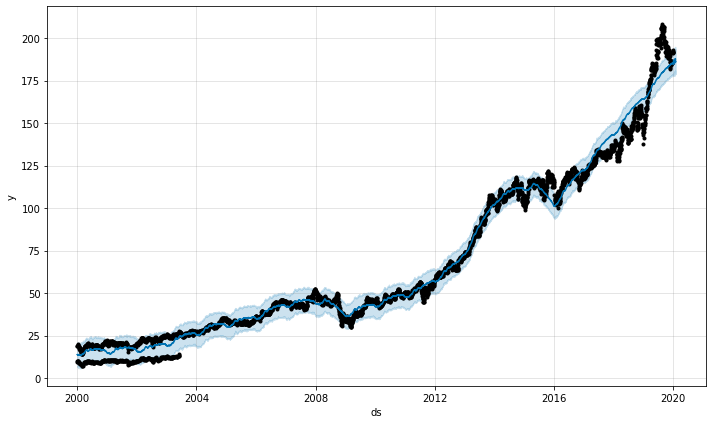

In [15]:
fig1 = m.plot(forecast)

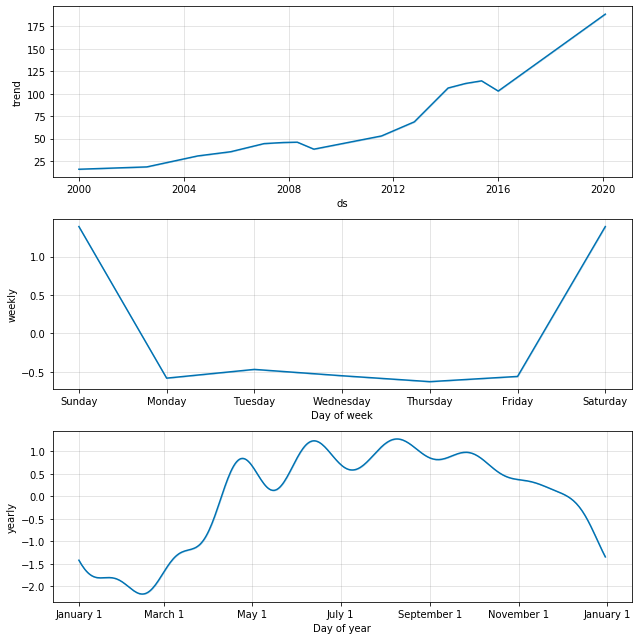

In [16]:
fig2 = m.plot_components(forecast)

In [18]:
if False:
    from fbprophet.plot import plot_plotly
    import plotly.offline as py
    py.init_notebook_mode()

    fig = plot_plotly(m, forecast)  # This returns a plotly Figure
    py.iplot(fig)

In [ ]:
#Walk this forward and compare to ARIMA Baseline